# ML Model to predict the AWS Product

### Import the necessary libraries

In [1]:
import pandas as pd
import csv

In [2]:
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
pd.set_option('display.max_colwidth', 150)

### (A) Read the CSV file

In [3]:
df = pd.read_csv('C:\\Users\\Aruna\\Documents\\ACMS-IID\\input\\CleanText.csv')
df['description'] = df['description'].apply(lambda x: " ".join(x for x in str(x).split()))
df.head(10)

,id,label,description
0,5829.0,Amazon CloudFront,chunked encoding resumable downloads supports something coming soon
1,5829.0,Amazon CloudFront,keith4pluralsight supports resumable downloads chunked encoding time plans support chunked encoding certainly interested community opinion.thanks ...
2,5829.0,Amazon CloudFront,chunked encoding especially usedul edge low latency critical want flush html client soon possible allow start parsing prefetching critical resourc...
3,5828.0,Amazon CloudFront,debug error accessing resources simple means debugging configuration supposed provide access contents bucket trying find consistent means creating...
4,5828.0,Amazon CloudFront,tried using cloudtrail contains sorts events search events username access bucket name etc seeing specific events try setting logging relevant buc...
5,5827.0,Amazon CloudFront,feature request custom headers e.g set hsts csp xframeoptions love see ability custom headers inside e.g stricttransportsecurity contentsecuritypo...
6,5827.0,Amazon CloudFront,agree prevent many hacking attempts going today important support headers love set following headers someid.cloudfront.net distribution stricttran...
7,5827.0,Amazon CloudFront,yes owasp zap site security warnings lack secure headers assets served activate whole suite secure headers great
8,5827.0,Amazon CloudFront,headers listed fun get security researcher reports cannot fix issue required headers supported need mostly xframeoptions hsts plan every security ...
9,5827.0,Amazon CloudFront,xframeoptions owasp zap got warnings


#### Check the spread of tags in the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461130 entries, 0 to 461129
Data columns (total 3 columns):
id             461128 non-null float64
label          461130 non-null object
description    461130 non-null object
dtypes: float64(1), object(2)
memory usage: 10.6+ MB


In [5]:
df['label'].describe()

count         461130
unique             8
top       Amazon EC2
freq          293285
Name: label, dtype: object

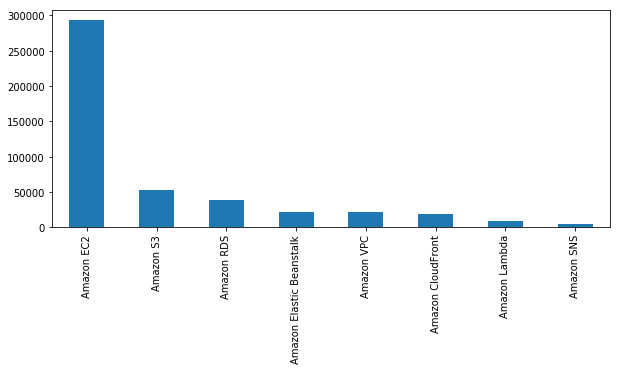

In [6]:
plt.figure(figsize=(10,4))
df.label.value_counts().plot(kind='bar');

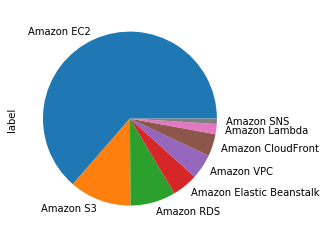

In [7]:
plt.figure(figsize=(100,4))
df.label.value_counts().plot(kind='pie');

#### Check out one sample post

In [8]:
df['description'][100]

'still issue though try request different box first mac get different failure s3api putobject endpointurl bucket mybucket myfile.txt error occurred signaturedoesnotmatch calling putobject operation request signature calculated match signature provided check signing method request works boxes use standard endpoint still think must issue configuration s3api putobject endpointurl bucket mybucket myfile.txt'

#### Top 30 words + frequency of each:

In [9]:
freq = pd.Series(' '.join(df['description']).split()).value_counts()[:30]
freq

instance     395738
using        104252
instances     97891
server        96551
new           88024
error         86684
get           84382
use           80192
one           76118
issue         73673
ms            73196
running       71212
see           69321
file          69220
like          66348
time          64909
problem       64499
need          63643
help          59749
access        58690
also          58121
volume        56699
data          55316
still         49109
ebs           45677
set           44538
create        44263
bucket        44090
request       43853
ssh           42467
dtype: int64

In [10]:
print("There are totally", df['description'].apply(lambda x: len(x.split(' '))).sum(), "words.")

There are totally 18374768 words.


### (C) Feature Engineering & Model Deployment

In [12]:
from sklearn.model_selection import train_test_split

X = df['description'].values
y = df['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

X_train.shape

(368904,)

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## Linear SVC Model

In [14]:
from sklearn.svm import LinearSVC

svm = Pipeline([('vect', TfidfVectorizer(ngram_range=(1,2))), ('clf', LinearSVC())])

svm.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [15]:
predictions = svm.predict(X_test)
print(classification_report(y_test, predictions))
print('accuracy:', accuracy_score(predictions, y_test))

                          precision    recall  f1-score   support

       Amazon CloudFront       0.85      0.63      0.72      3754
              Amazon EC2       0.87      0.96      0.91     58836
Amazon Elastic Beanstalk       0.85      0.63      0.72      4430
           Amazon Lambda       0.85      0.63      0.72      1798
              Amazon RDS       0.88      0.77      0.82      7661
               Amazon S3       0.81      0.72      0.76     10566
              Amazon SNS       0.89      0.67      0.76       901
              Amazon VPC       0.81      0.59      0.68      4280

               micro avg       0.86      0.86      0.86     92226
               macro avg       0.85      0.70      0.76     92226
            weighted avg       0.86      0.86      0.85     92226

accuracy: 0.8587057879556741


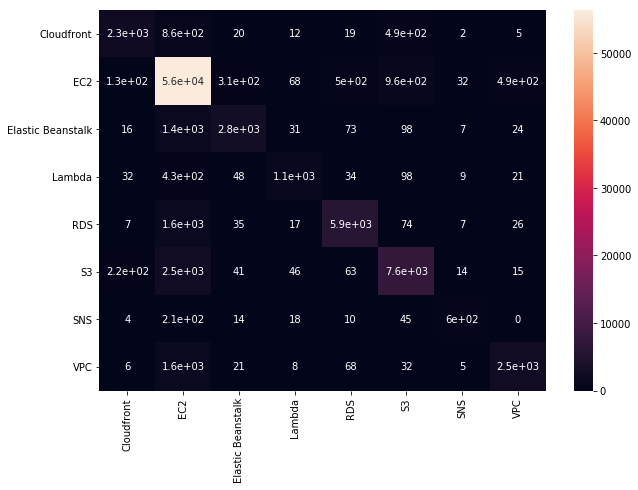

In [16]:
array = confusion_matrix(y_test, predictions);
names = ["Cloudfront", "EC2", "Elastic Beanstalk", "Lambda", "RDS", "S3", "SNS", "VPC"]

df_cm = pd.DataFrame(array, index = [i for i in names], columns = [i for i in names])

plt.figure(figsize = (10,7))
sb.heatmap(df_cm, annot=True)


In [17]:
confusion_matrix(y_test, predictions)

array([[ 2349,   856,    20,    12,    19,   491,     2,     5],
       [  128, 56349,   314,    68,   502,   955,    32,   488],
       [   16,  1409,  2772,    31,    73,    98,     7,    24],
       [   32,   427,    48,  1129,    34,    98,     9,    21],
       [    7,  1621,    35,    17,  5874,    74,     7,    26],
       [  224,  2546,    41,    46,    63,  7617,    14,    15],
       [    4,   210,    14,    18,    10,    45,   600,     0],
       [    6,  1635,    21,     8,    68,    32,     5,  2505]],
      dtype=int64)

## Parameter tuning

In [19]:
from sklearn.model_selection import GridSearchCV

parameters = {'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


clf = GridSearchCV(svm, parameters, cv=3)

clf.fit(X_train, y_train)

print("Best Score: ", clf.best_score_)
print("Best Params: ", clf.best_params_)

C:\Users\Aruna\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Aruna\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Aruna\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Aruna\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Aruna\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

Best Score:  0.7801067784586994
Best Params:  {'clf__C': 1}


In [20]:
from sklearn.model_selection import GridSearchCV

parameters = {'vect__ngram_range': [(1,1), (1,2), (1,3)]}


clf = GridSearchCV(svm, parameters, cv=3)

clf.fit(X_train, y_train)

print("Best Score: ", clf.best_score_)
print("Best Params: ", clf.best_params_)

Best Score:  0.7898245782464225
Best Params:  {'vect__ngram_range': (1, 2)}


In [21]:
from sklearn.model_selection import GridSearchCV

parameters = {'vect__use_idf': [True, False]}


clf = GridSearchCV(svm, parameters, cv=3)

clf.fit(X_train, y_train)

print("Best Score: ", clf.best_score_)
print("Best Params: ", clf.best_params_)

Best Score:  0.7801067784586994
Best Params:  {'vect__use_idf': True}


In [22]:
from sklearn.model_selection import GridSearchCV

parameters = {'clf__max_iter':  [100, 1000, 10000]}


clf = GridSearchCV(svm, parameters, cv=3)

clf.fit(X_train, y_train)

print("Best Score: ", clf.best_score_)
print("Best Params: ", clf.best_params_)

Best Score:  0.7801067784586994
Best Params:  {'clf__max_iter': 100}


In [23]:
from sklearn.model_selection import GridSearchCV

parameters = {'vect__max_features': [100, 1000, 10000]}


clf = GridSearchCV(svm, parameters, cv=3)

clf.fit(X_train, y_train)

print("Best Score: ", clf.best_score_)
print("Best Params: ", clf.best_params_)

Best Score:  0.769066248513262
Best Params:  {'vect__max_features': 10000}


In [25]:
from sklearn.model_selection import GridSearchCV

parameters = {'vect__min_df': [1, 0.01, 0.05, 0.1]}


clf = GridSearchCV(svm, parameters, cv=3)

clf.fit(X_train, y_train)

print("Best Score: ", clf.best_score_)
print("Best Params: ", clf.best_params_)

Best Score:  0.7801067784586994
Best Params:  {'vect__min_df': 1}


In [26]:
from sklearn.model_selection import GridSearchCV

parameters = {'vect__max_df': [1.0, 0.9, 0.8, 0.7]}


clf = GridSearchCV(svm, parameters, cv=3)

clf.fit(X_train, y_train)

print("Best Score: ", clf.best_score_)
print("Best Params: ", clf.best_params_)

Best Score:  0.7801067784586994
Best Params:  {'vect__max_df': 1.0}


#### Conclusion: No additional factors need to be tuned in the SVM model apart from adding bi-gram instead of uni-gram features.

### Tuned Model

In [27]:
svm = Pipeline([('vect', TfidfVectorizer(ngram_range=(1,2))), ('clf', LinearSVC())])
svm.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [28]:
predictions = svm.predict(X_test)
print(classification_report(y_test, predictions))
print('accuracy:', accuracy_score(predictions, y_test))

                          precision    recall  f1-score   support

       Amazon CloudFront       0.82      0.64      0.72      5723
              Amazon EC2       0.78      0.89      0.83     30066
Amazon Elastic Beanstalk       0.82      0.67      0.74      6717
           Amazon Lambda       0.86      0.65      0.74      2671
              Amazon RDS       0.85      0.81      0.83     11594
               Amazon S3       0.79      0.84      0.81     15950
              Amazon SNS       0.88      0.67      0.76      1376
              Amazon VPC       0.80      0.65      0.72      6257

               micro avg       0.80      0.80      0.80     80354
               macro avg       0.82      0.73      0.77     80354
            weighted avg       0.80      0.80      0.80     80354

accuracy: 0.7989770266570426


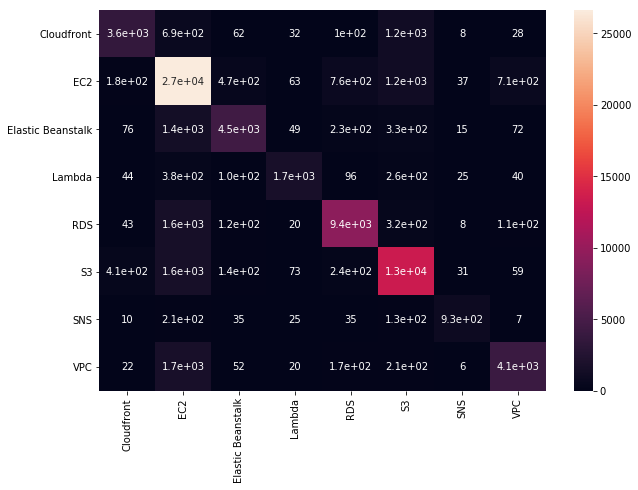

In [29]:
array = confusion_matrix(y_test, predictions);
names = ["Cloudfront", "EC2", "Elastic Beanstalk", "Lambda", "RDS", "S3", "SNS", "VPC"]

df_cm = pd.DataFrame(array, index = [i for i in names], columns = [i for i in names])

plt.figure(figsize = (10,7))
sb.heatmap(df_cm, annot=True)

In [30]:
confusion_matrix(y_test, predictions)

array([[ 3637,   692,    62,    32,   100,  1164,     8,    28],
       [  177, 26612,   474,    63,   761,  1232,    37,   710],
       [   76,  1430,  4515,    49,   226,   334,    15,    72],
       [   44,   382,   105,  1723,    96,   256,    25,    40],
       [   43,  1593,   121,    20,  9374,   321,     8,   114],
       [  410,  1642,   143,    73,   244, 13348,    31,    59],
       [   10,   212,    35,    25,    35,   126,   926,     7],
       [   22,  1714,    52,    20,   166,   211,     6,  4066]],
      dtype=int64)

In [24]:
LinearSVC?

In [ ]:
# Choose some parameter combinations to try
parameters = {
    'vect__ngram_range': [(1,1), (1,2), (1,3)],
    'vect__max_df': [1.0, 0.9, 0.8, 0.7],
    'vect__min_df': [1, 0.01, 0.05, 0.1],
    'vect__max_features': [100, 1000, None],
    'vect__use_idf': [True, False],
    'clf__c': [0.1, 1, 10, 100, 1000],
    'clf__max_iter':  [100, 1000, 10000]
}